In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import csv
import scipy.stats as st
from scipy.stats import linregress
import time
from datetime import date
%matplotlib inline


In [3]:
#Study the summary_data
summary_path = "Data/Summary_Data.csv"

#Read the Covid summary data
summary_data = pd.read_csv(summary_path)
summary_data.rename(columns={'Unnamed: 0': 'Dates'}, inplace = True)
summary_data

#summary_data['Month'] = pd.DatetimeIndex(summary_data['Dates']).month


summary_data_result = summary_data[(pd.to_datetime(summary_data['Dates']).dt.strftime('%Y%m%d')) >= '20190601']
summary_data_result['YYMM'] = pd.to_datetime(summary_data_result['Dates']).dt.strftime('%y-%m')
summary_data_result


#summary_data['New Dates'] = pd.to_datetime(summary_data['Dates']).dt.strftime('%y-%m')
#summary_data

#summary_data_reduce = summary_data[summary_data.Dates>='21-01-2019']
#summary_data_reduce



<ipython-input-3-f0b45a76f65e>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  summary_data_result['YYMM'] = pd.to_datetime(summary_data_result['Dates']).dt.strftime('%y-%m')


,Dates,Pedestrians_Count,Lockdown_Stage,Vehicle_Count,Covid_Cases,YYMM
10,01-01-2020,710047,Stage 0,13996.0,0.0,20-01
11,01-01-2021,396955,Stage 0,NaN,10.0,21-01
22,01-02-2020,761505,Stage 0,19155.0,0.0,20-01
23,01-02-2021,349099,Stage 0,NaN,0.0,21-01
34,01-03-2020,706476,Stage 0,16766.0,2.0,20-01
...,...,...,...,...,...,...
4390,31-08-2020,102497,Stage 4,NaN,57.0,20-08
4401,31-10-2019,791985,Stage 0,23824.0,0.0,19-10
4402,31-10-2020,370181,Stage 2,NaN,0.0,20-10
4413,31-12-2019,950487,Stage 0,20052.0,0.0,19-12


In [4]:
summary_data_stage = summary_data_result.groupby(['YYMM','Lockdown_Stage']).agg({'Covid_Cases' :'sum'})  
summary_data_stage


,,Covid_Cases
YYMM,Lockdown_Stage,
19-06,Stage 0,0.0
19-07,Stage 0,0.0
19-08,Stage 0,0.0
19-09,Stage 0,0.0
19-10,Stage 0,0.0
19-11,Stage 0,0.0
19-12,Stage 0,0.0
20-01,Stage 0,796.0
20-02,Stage 0,557.0


In [5]:
summary_data_stage.to_csv('Data/Summary_data_stages.csv')

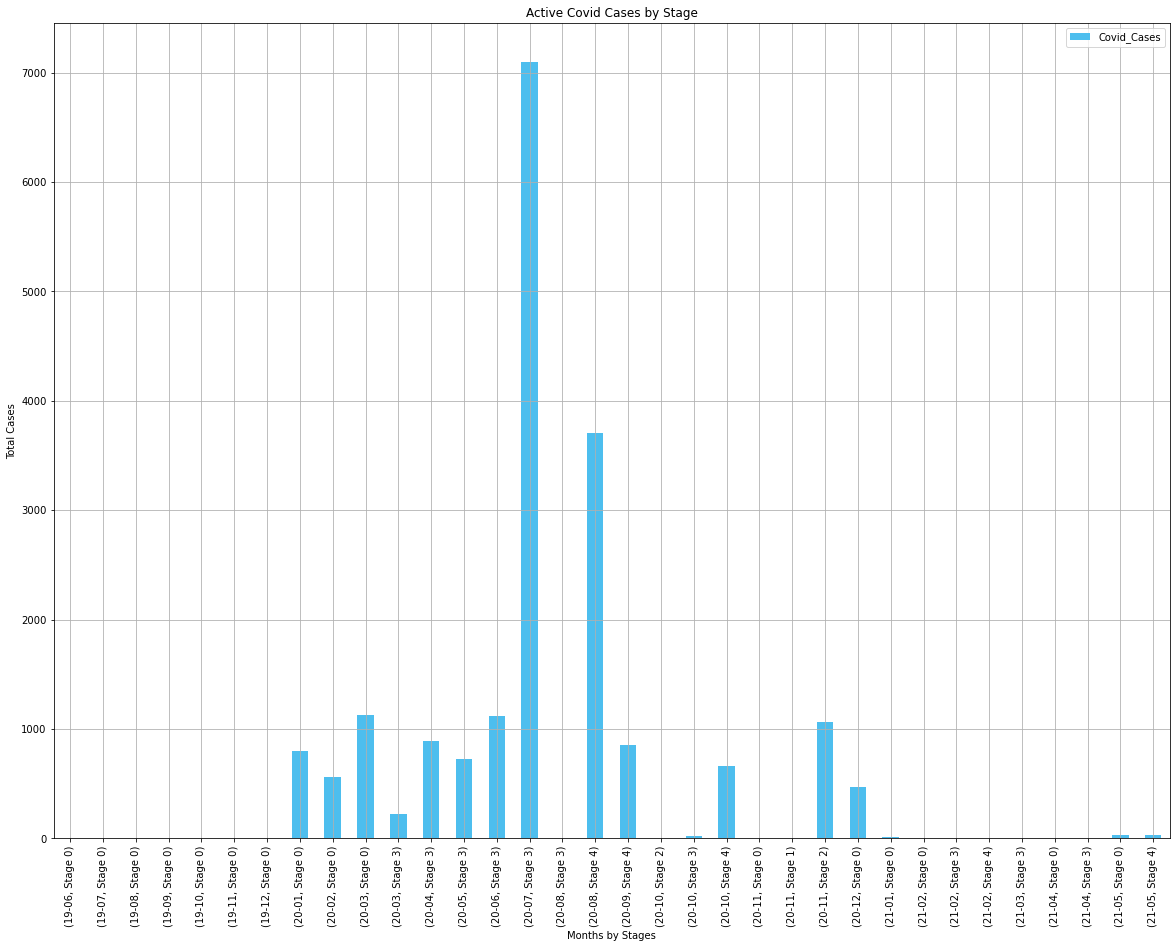

In [6]:
plotchart = summary_data_stage
plotchart.plot(kind = "bar",color='#4DBEEE', figsize=(20, 15))

plt.title("Active Covid Cases by Stage")
plt.xlabel("Months by Stages")
plt.ylabel("Total Cases")
plt.grid()
plt.show


plt.savefig('Images/active_covid_stages.png')






